### Import Library

In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from xgboost import XGBClassifier

### Read Dataset

In [4]:
# load the dataset
train = pd.read_csv(r'C:\Users\ACE GROUP\Downloads\Compressed\home-credit-default-risk\application_train.csv', sep=',')
df = train.copy()

In [5]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### Data Overview

In [6]:
print('Total rows and columns from the dataset:', df.shape)

Total rows and columns from the dataset: (307511, 122)


In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

### Data Cleaning

In [9]:
df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [10]:
unknownrows = df.isna().sum(axis=1)
unknownrows

0          1
1          2
2         48
3         56
4         50
5         49
6         47
7         48
8         49
9         56
10        48
11        49
12        20
13         1
14         8
15        47
16        49
17        56
18         2
19        49
20        10
21        47
22         2
23         3
24         1
25         1
26        18
27        49
28        48
29         8
30        25
31        21
32        24
33        48
34         9
35        17
36        48
37        48
38        28
39         1
40         2
41        50
42        48
43         3
44        57
45        56
46        50
47        49
48        48
49        55
50        14
51        10
52        26
53        48
54        14
55         1
56        50
57         1
58        48
59         1
60         2
61         2
62        18
63        49
64         5
65         1
66        47
67        48
68         5
69         8
70         1
71         0
72        15
73        49
74        49
75        49
76        50

In [11]:
# replace unknown value
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

In [12]:
df.isna().values.any()

False

### Exploratory Data Analysis (EDA)
#### Univariate Analysis

In [13]:
cat = df.select_dtypes(include='object').columns.tolist()
num = df.select_dtypes(exclude='object').columns.tolist()

print('This are the categorical variable:', cat)
print('\n')
print('This are the numerical variable:', num)

This are the categorical variable: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


This are the numerical variable: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'E

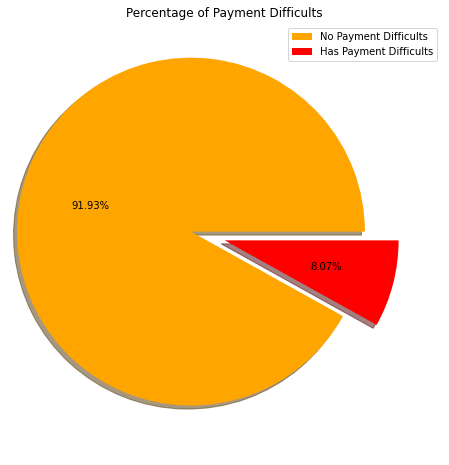

In [14]:
# percentage of problem payments
ax = df.groupby('TARGET').count().plot(kind='pie', y='SK_ID_CURR', figsize=(10,8), colors=['orange', 'red'], explode=(0.2,0), shadow=True, autopct='%1.2f%%', labels=None)
plt.title('Percentage of Payment Difficults')
plt.legend(['No Payment Difficults', 'Has Payment Difficults'], loc='upper right')
plt.ylabel('')
plt.show()

Calculate the percentage of ' NAME_CONTRACT_TYPE ' variable 



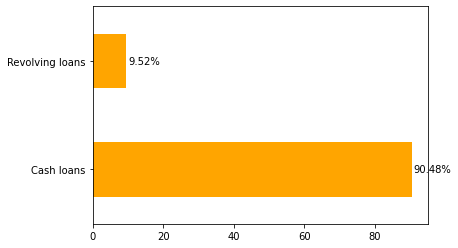


Calculate the percentage of ' CODE_GENDER ' variable 



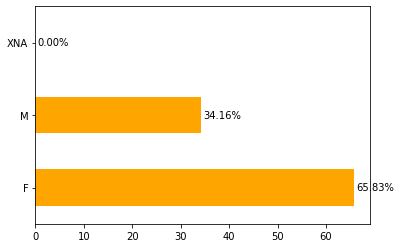


Calculate the percentage of ' FLAG_OWN_CAR ' variable 



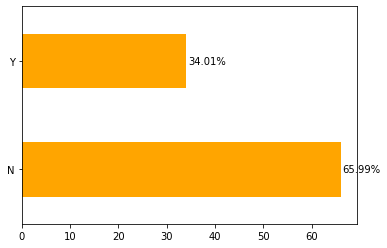


Calculate the percentage of ' FLAG_OWN_REALTY ' variable 



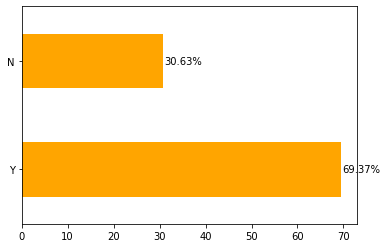


Calculate the percentage of ' NAME_TYPE_SUITE ' variable 



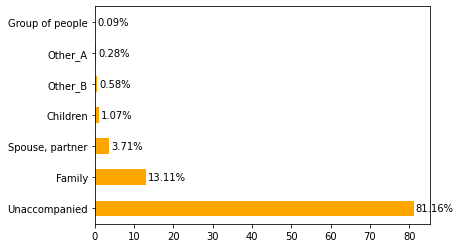


Calculate the percentage of ' NAME_INCOME_TYPE ' variable 



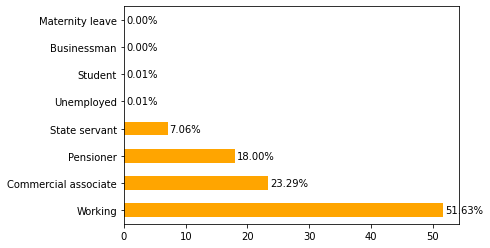


Calculate the percentage of ' NAME_EDUCATION_TYPE ' variable 



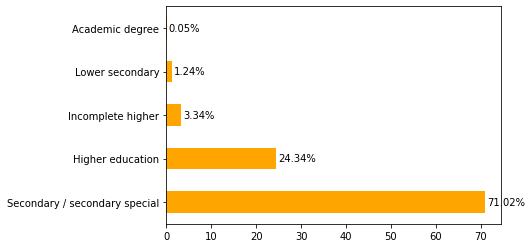


Calculate the percentage of ' NAME_FAMILY_STATUS ' variable 



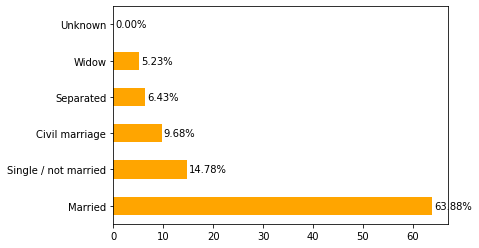


Calculate the percentage of ' NAME_HOUSING_TYPE ' variable 



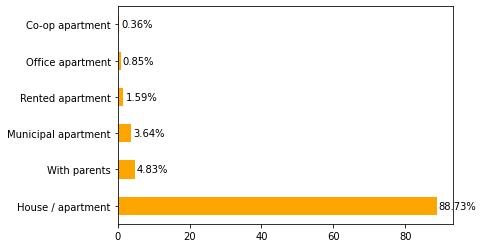


Calculate the percentage of ' OCCUPATION_TYPE ' variable 



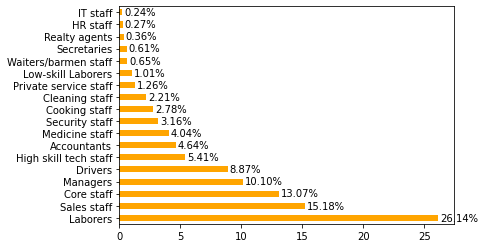


Calculate the percentage of ' WEEKDAY_APPR_PROCESS_START ' variable 



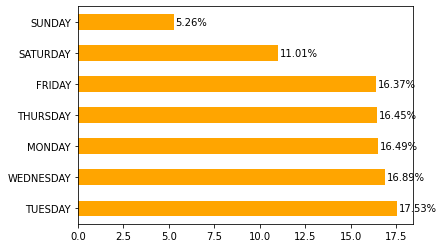


Calculate the percentage of ' ORGANIZATION_TYPE ' variable 



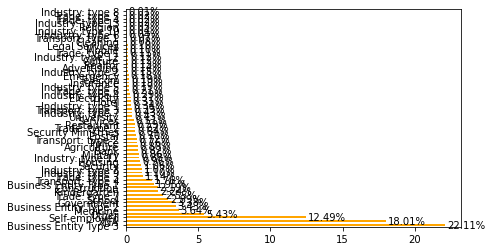


Calculate the percentage of ' FONDKAPREMONT_MODE ' variable 



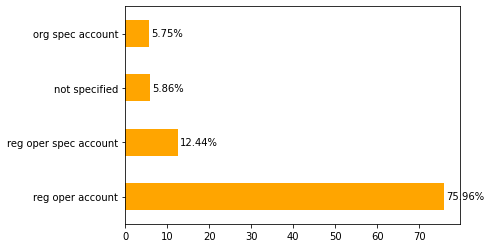


Calculate the percentage of ' HOUSETYPE_MODE ' variable 



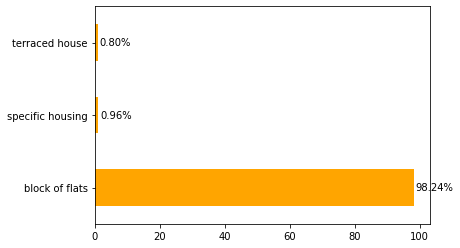


Calculate the percentage of ' WALLSMATERIAL_MODE ' variable 



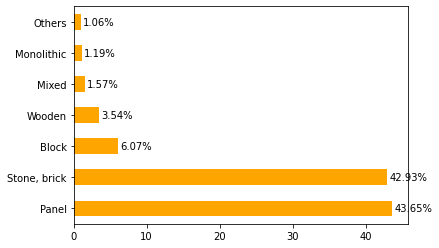


Calculate the percentage of ' EMERGENCYSTATE_MODE ' variable 



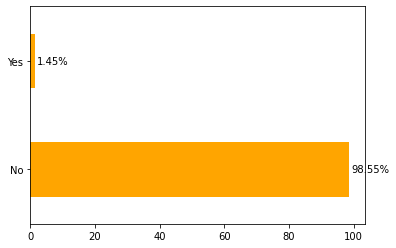

In [15]:
#categorical variable
for i in cat:
    # calculate the percentage of each category variable
    x = df[i].value_counts(normalize = True)*100
    print("Calculate the percentage of '",i,"' variable \n")
    ax = x.plot.barh(color = "orange")
    ax.bar_label(ax.containers[0], fmt='%.2f%%', padding=2)
    plt.show()
    print('='*50,'\n')

### Bivariate Analysis

In [19]:
train.TARGET = train.TARGET.replace([0,1], ['No Payment Difficult', 'Has Payment Difficult'])

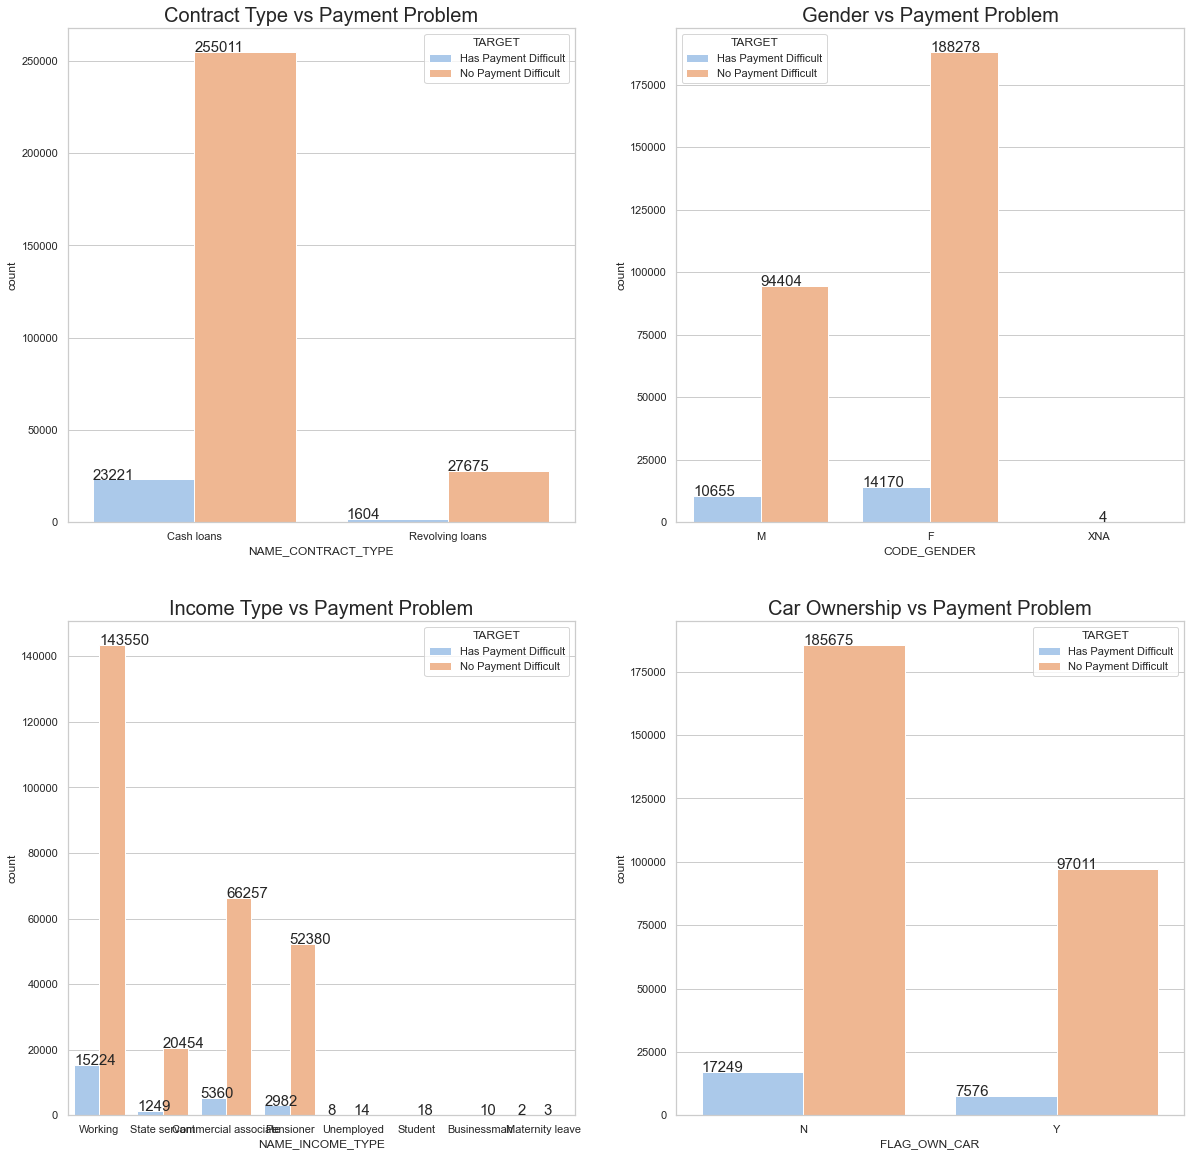

In [20]:
# visualizations of customer ability to pay based on contract type, gender, income type, education type
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(2, 2, figsize=(20,20))

ax[0][0].set_title('Contract Type vs Payment Problem', fontsize=20)
sns.countplot(data=train, x='NAME_CONTRACT_TYPE', hue='TARGET', palette='pastel', ax=ax[0][0])
for i in ax[0][0].patches:
    ax[0][0].annotate('{:.0f}'.format(i.get_height()),(i.get_x(), i.get_height()), size=15)
  
ax[0][1].set_title('Gender vs Payment Problem', fontsize=20)
sns.countplot(data=train, x='CODE_GENDER', hue='TARGET', palette='pastel', ax=ax[0][1])
for i in ax[0][1].patches:
    ax[0][1].annotate('{:.0f}'.format(i.get_height()),(i.get_x(), i.get_height()), size=15)

ax[1][0].set_title('Income Type vs Payment Problem', fontsize=20)
sns.countplot(data=train, x='NAME_INCOME_TYPE', hue='TARGET', palette='pastel', ax=ax[1][0])
for i in ax[1][0].patches:
    ax[1][0].annotate('{:.0f}'.format(i.get_height()),(i.get_x(), i.get_height()), size=15)
                      
ax[1][1].set_title('Car Ownership vs Payment Problem', fontsize=20)
sns.countplot(data=train, x='FLAG_OWN_CAR', hue='TARGET', palette='pastel', ax=ax[1][1])
for i in ax[1][1].patches:
    ax[1][1].annotate('{:.0f}'.format(i.get_height()),(i.get_x(), i.get_height()), size=15)
    

1. Around 9% of customers who borrow cash loans are more likely to have payment difficulties compared to those who have revolving loans. 
2. Around 11% of male customers typically encounter payment difficulties.
3. Customers who are on maternity leave tend to experience more payment difficulties compared to others.
4. Around 9% of customers who are not owning car tend to have more payment difficulties than those who own one.

In [21]:
df[['NAME_CONTRACT_TYPE','TARGET']].groupby(['NAME_CONTRACT_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

NAME_CONTRACT_TYPE    TARGET
0         Cash loans  0.083459
1    Revolving loans  0.054783

In [22]:
df[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

CODE_GENDER    TARGET
0           M  0.101419
1           F  0.069993
2         XNA  0.000000

In [23]:
df[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

NAME_INCOME_TYPE    TARGET
0       Maternity leave  0.400000
1            Unemployed  0.363636
2               Working  0.095885
3  Commercial associate  0.074843
4         State servant  0.057550
5             Pensioner  0.053864
6           Businessman  0.000000
7               Student  0.000000

In [24]:
df[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

FLAG_OWN_CAR    TARGET
0            N  0.085002
1            Y  0.072437

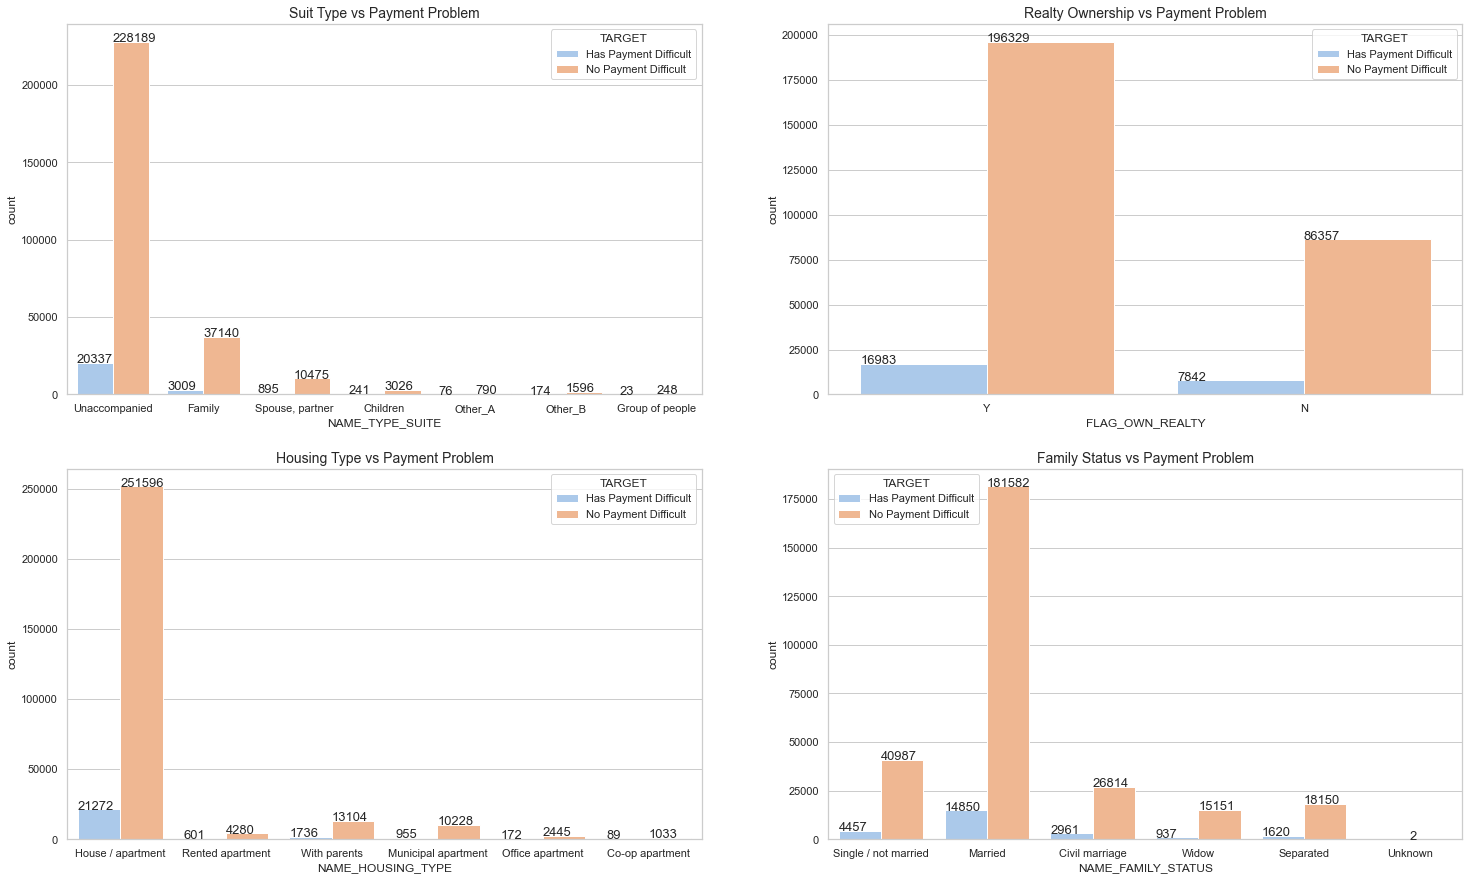

In [25]:
#visualizations of customer ability to pay based on contract type, gender, income type, education type
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(2, 2, figsize=(25,15))
sns.set_context('notebook', font_scale=1)

ax[0][0].set_title('Suit Type vs Payment Problem', fontsize=14)
sns.countplot(data=train, x='NAME_TYPE_SUITE', hue='TARGET', palette='pastel', ax=ax[0][0])
for i in ax[0][0].patches:
    ax[0][0].annotate('{:.0f}'.format(i.get_height()),(i.get_x(), i.get_height()), size=13)
  
ax[0][1].set_title('Realty Ownership vs Payment Problem', fontsize=14)
sns.countplot(data=train, x='FLAG_OWN_REALTY', hue='TARGET', palette='pastel', ax=ax[0][1])
for i in ax[0][1].patches:
    ax[0][1].annotate('{:.0f}'.format(i.get_height()),(i.get_x(), i.get_height()), size=13)

ax[1][0].set_title('Housing Type vs Payment Problem', fontsize=14)
sns.countplot(data=train, x='NAME_HOUSING_TYPE', hue='TARGET', palette='pastel', ax=ax[1][0])
for i in ax[1][0].patches:
    ax[1][0].annotate('{:.0f}'.format(i.get_height()),(i.get_x(), i.get_height()), size=13)
                      
ax[1][1].set_title('Family Status vs Payment Problem', fontsize=14)
sns.countplot(data=train, x='NAME_FAMILY_STATUS', hue='TARGET', palette='pastel', ax=ax[1][1])
for i in ax[1][1].patches:
    ax[1][1].annotate('{:.0f}'.format(i.get_height()),(i.get_x(), i.get_height()), size=13)
    

1. Customers who have Other_B suite type tend to experience payment problems.
2. Customers who do not own real estate tend to face payment difficulties.
3. Customers who do live in rented apartment or with parents mostly have payment difficulties.
4. Civil marriage and single customer have tendency to face payment difficulties

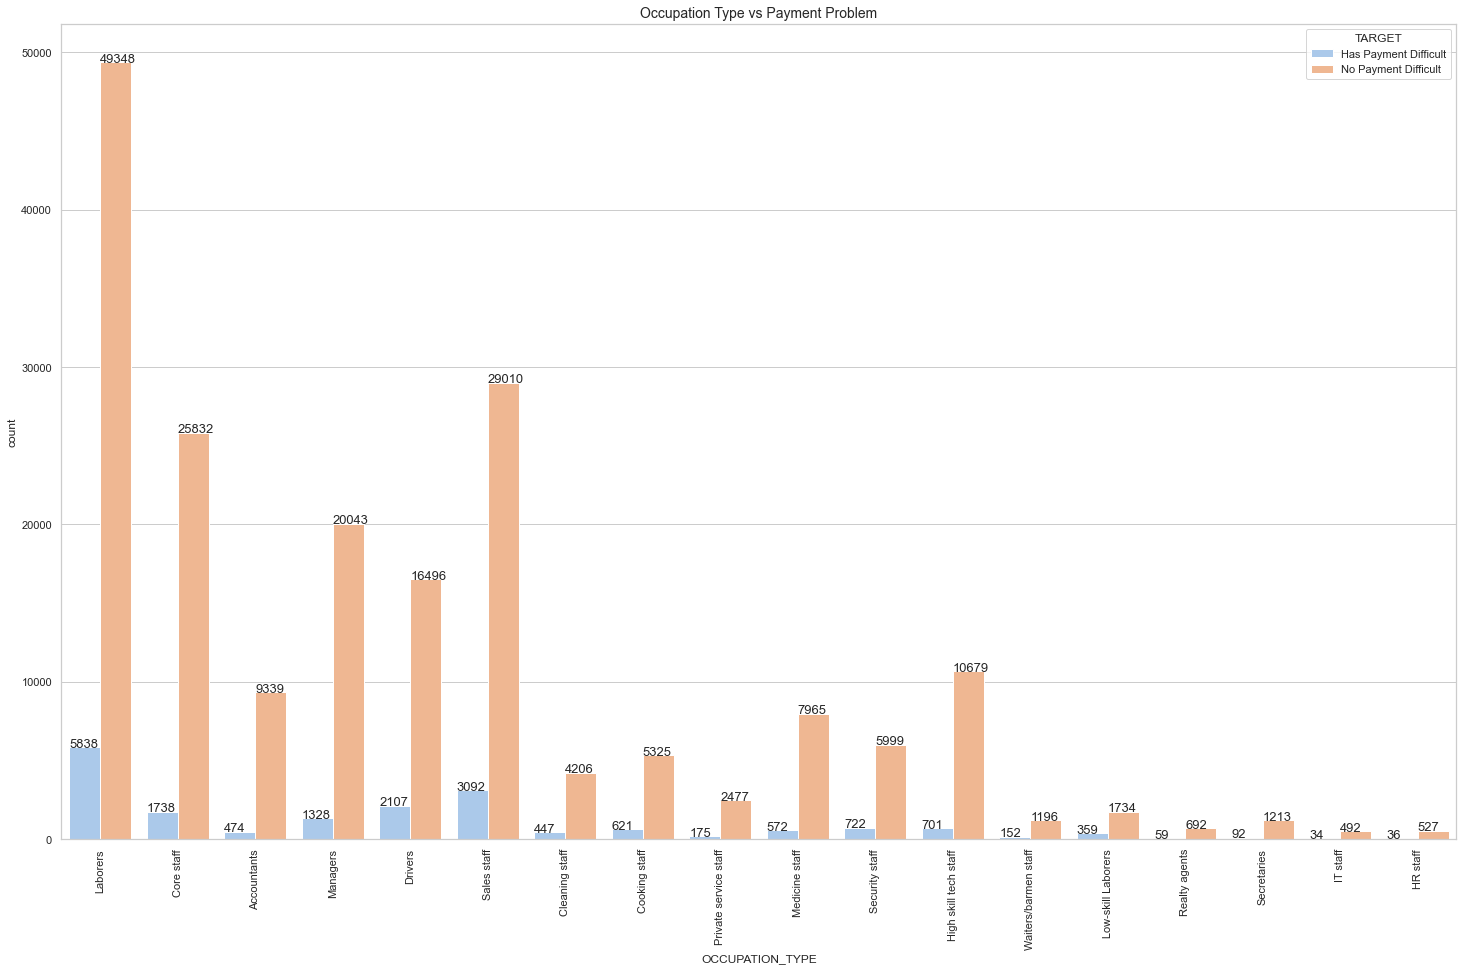

In [26]:
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(25,15))
sns.set_context('notebook', font_scale=1)

ax.set_title('Occupation Type vs Payment Problem', fontsize=14)
sns.countplot(data=train, x='OCCUPATION_TYPE', hue='TARGET', palette='pastel', ax=ax)
for i in ax.patches:
    ax.annotate('{:.0f}'.format(i.get_height()),(i.get_x(), i.get_height()), size=13)
plt.xticks(rotation=90)
plt.show()

Customers with occupation Low-skill laborers, drivers, and waiters/barmen staff tends to have payment problem

In [27]:
df[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

OCCUPATION_TYPE    TARGET
0      Low-skill Laborers  0.137066
1                 Drivers  0.098010
2    Waiters/barmen staff  0.096888
3          Security staff  0.095675
4                Laborers  0.093127
5           Cooking staff  0.092588
6             Sales staff  0.086863
7          Cleaning staff  0.086123
8           Realty agents  0.073973
9             Secretaries  0.068049
10         Medicine staff  0.065846
11  Private service staff  0.064767
12               Managers  0.063112
13             Core staff  0.062436
14  High skill tech staff  0.062342
15               IT staff  0.061745
16               HR staff  0.059250
17            Accountants  0.056454

In [28]:
df[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

NAME_TYPE_SUITE    TARGET
0          Other_B  0.097973
1          Other_A  0.088710
2  Group of people  0.083942
3    Unaccompanied  0.081727
4  Spouse, partner  0.078627
5           Family  0.074790
6         Children  0.073408

In [29]:
df[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

FLAG_OWN_REALTY    TARGET
0               N  0.083249
1               Y  0.079616

In [30]:
df[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

NAME_HOUSING_TYPE    TARGET
0     Rented apartment  0.123131
1         With parents  0.116981
2  Municipal apartment  0.085397
3      Co-op apartment  0.079323
4    House / apartment  0.077957
5     Office apartment  0.065724

In [31]:
df[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False).reset_index(drop=True)

NAME_FAMILY_STATUS    TARGET
0        Civil marriage  0.099446
1  Single / not married  0.098077
2             Separated  0.081942
3               Married  0.075599
4                 Widow  0.058242
5               Unknown  0.000000

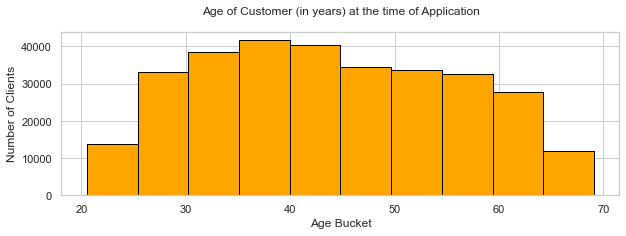

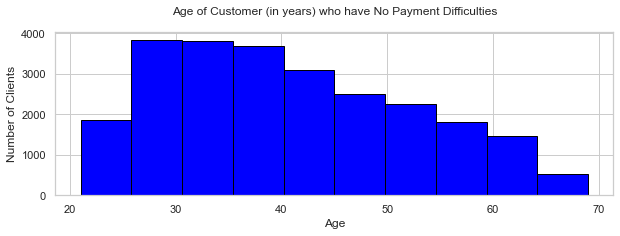

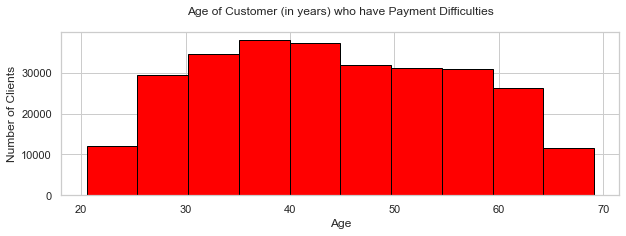

In [90]:
# Extract age information and divide by -365 to convert from days to years
age = train['DAYS_BIRTH'] / 365 

# Plot age distribution of all customers
plt.figure(figsize = (10,3))
plt.hist(age, bins = 10, edgecolor='black', color='orange')
plt.title('Age of Customer (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

# Plot age distribution of customers with no payment difficulties
no_age = age[train['TARGET'] == 0]
plt.figure(figsize = (10,3))
plt.hist(no_age, bins = 10, edgecolor='black', color='blue')
plt.title('Age of Customer (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

# Plot age distribution of customers with payment difficulties
yes_age = age[train['TARGET'] == 1]
plt.figure(figsize = (10,3))
plt.hist(yes_age, bins = 10, edgecolor = 'black', color = 'red')
plt.title('Age of Customer (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Customer in age range 30 to 40 are mostly do not have payment difficulties, but also customer in age 35 to 45 are mostly have payment difficulties. 

### Data Preprocessing

In [32]:
# calculate percentage of missing value each variable
def percent_missing(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    total_missing = df.isnull().sum()
    percentages = pd.DataFrame({'column name': df.columns,
                                  'total missing values': total_missing,
                                  'percentage of missing value': percent_missing})
    percentages.sort_values('percentage of missing value', inplace=True)
    percentages.reset_index(drop=True, inplace=True)
    return percentages


In [33]:
percent_missing(train)

column name  total missing values  \
0                      SK_ID_CURR                     0   
1         HOUR_APPR_PROCESS_START                     0   
2      REG_REGION_NOT_WORK_REGION                     0   
3     LIVE_REGION_NOT_WORK_REGION                     0   
4          REG_CITY_NOT_LIVE_CITY                     0   
5          REG_CITY_NOT_WORK_CITY                     0   
6         LIVE_CITY_NOT_WORK_CITY                     0   
7               ORGANIZATION_TYPE                     0   
8                FLAG_DOCUMENT_21                     0   
9                FLAG_DOCUMENT_20                     0   
10               FLAG_DOCUMENT_19                     0   
11               FLAG_DOCUMENT_18                     0   
12               FLAG_DOCUMENT_17                     0   
13               FLAG_DOCUMENT_16                     0   
14               FLAG_DOCUMENT_15                     0   
15               FLAG_DOCUMENT_14                     0   
16               FLAG_DOCUMENT_13                     0   
17               FLAG_DOCUMENT_12                     0   
18               FLAG_DOCUMENT_11                     0   
19               FLAG_DOCUMENT_10                     0   
20                FLAG_DOCUMENT_9                     0   
21                FLAG_DOCUMENT_8                     0   
22                FLAG_DOCUMENT_7                     0   
23                FLAG_DOCUMENT_6                     0   
24                FLAG_DOCUMENT_5                     0   
25                FLAG_DOCUMENT_4                     0   
26                FLAG_DOCUMENT_3                     0   
27                FLAG_DOCUMENT_2                     0   
28     WEEKDAY_APPR_PROCESS_START                     0   
29    REGION_RATING_CLIENT_W_CITY                     0   
30     REG_REGION_NOT_LIVE_REGION                     0   
31              NAME_HOUSING_TYPE                     0   
32                   CNT_CHILDREN                     0   
33               NAME_INCOME_TYPE                     0   
34            NAME_EDUCATION_TYPE                     0   
35             NAME_FAMILY_STATUS                     0   
36           REGION_RATING_CLIENT                     0   
37     REGION_POPULATION_RELATIVE                     0   
38                     DAYS_BIRTH                     0   
39                  DAYS_EMPLOYED                     0   
40              DAYS_REGISTRATION                     0   
41                DAYS_ID_PUBLISH                     0   
42               AMT_INCOME_TOTAL                     0   
43                FLAG_OWN_REALTY                     0   
44                    CODE_GENDER                     0   
45             NAME_CONTRACT_TYPE                     0   
46                     FLAG_MOBIL                     0   
47                 FLAG_EMP_PHONE                     0   
48                FLAG_WORK_PHONE                     0   
49               FLAG_CONT_MOBILE                     0   
50                     FLAG_PHONE                     0   
51                         TARGET                     0   
52                     FLAG_EMAIL                     0   
53                   FLAG_OWN_CAR                     0   
54                     AMT_CREDIT                     0   
55         DAYS_LAST_PHONE_CHANGE                     1   
56                CNT_FAM_MEMBERS                     2   
57                    AMT_ANNUITY                    12   
58                AMT_GOODS_PRICE                   278   
59                   EXT_SOURCE_2                   660   
60       DEF_30_CNT_SOCIAL_CIRCLE                  1021   
61       DEF_60_CNT_SOCIAL_CIRCLE                  1021   
62       OBS_60_CNT_SOCIAL_CIRCLE                  1021   
63       OBS_30_CNT_SOCIAL_CIRCLE                  1021   
64                NAME_TYPE_SUITE                  1292   
65     AMT_REQ_CREDIT_BUREAU_HOUR                 41519   
66      AMT_REQ_CREDIT_BUREAU_DAY                 41519   
67      AM

In [34]:
# drop columns with missing value over 30%
nullvalue = pd.DataFrame(train.isnull().sum(), columns=['Total Null Value']).reset_index()
nullvalue['percentage'] = (nullvalue['Total Null Value']/ len(train)) * 100
nullvalue[nullvalue['percentage'] > 30].sort_values(by='percentage', ascending=False)

missing_data = list(nullvalue[nullvalue['percentage'] > 30]['index'])

In [35]:
train.drop(columns=missing_data, inplace=True)

In [36]:
train.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [38]:
# make new categorical and numerical data after column dropping
cat_new = train.select_dtypes(include='object').columns.tolist()
num_new = train.select_dtypes(exclude='object').columns.tolist()

In [39]:
# replace null value from the data frame with median and mode
num_cols = train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

train[num_cols] = train[num_cols].fillna(train[num_cols].median())
train[cat_cols] = train[cat_cols].fillna(train[cat_cols].mode().iloc[0])

In [40]:
# check missing value
print('Total Null Value of Data Frame:')
print(train.isnull().sum())

Total Null Value of Data Frame:
SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATI

### Feature Engineering

In [41]:
#encoding categorical variable (object data type)
le = LabelEncoder()
train[cat_new] = train[cat_new].apply(lambda x: le.fit_transform(x.astype(str)))
train.head()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       0                   0            1             0   
1      100003       1                   0            0             0   
2      100004       1                   1            1             1   
3      100006       1                   0            0             0   
4      100007       1                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         351000.0                6                 7                    4   
1        1129500.0                1                 4                    1   
2         135000.0                6                 7                    4   
3         297000.0                6                 7                    4   
4         513000.0                6                 7                    4   

   NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0                   3                  1                    0.018801   
1                   1                  1                    0.003541   
2                   3                  1                    0.010032   
3                   0                  1                    0.008019   
4                   3                  1                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0       -9461           -637            -3648.0            -2120           1   
1      -16765          -1188            -1186.0             -291           1   
2      -19046           -225            -4260.0            -2531           1   
3      -19005          -3039            -9833.0            -2437           1   
4      -19932          -3038            -4311.0            -3458           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                           6                       10   
1                           1                       11   
2                           1                        9   
3                           6                       17   
4                           4                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                 

In [42]:
#convert negative value to positive
def make_positive(x):
    if x < 0:
        return -x
    else:
        return x

train = train.applymap(make_positive)

In [43]:
# choosing independent and dependent variable
x = train.drop(['TARGET'], axis=1)
y = train['TARGET']

In [44]:
# select best features of the data
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
featureScores.sort_values(by = ['Score'], ascending = False).reset_index(drop=True)

Features         Score
0                 DAYS_EMPLOYED  1.954124e+08
1               AMT_GOODS_PRICE  1.223080e+08
2                    AMT_CREDIT  7.669987e+07
3                    DAYS_BIRTH  2.235391e+06
4              AMT_INCOME_TOTAL  1.624102e+06
5             DAYS_REGISTRATION  1.348566e+06
6        DAYS_LAST_PHONE_CHANGE  6.656876e+05
7               DAYS_ID_PUBLISH  6.195946e+05
8                   AMT_ANNUITY  3.913092e+05
9                    SK_ID_CURR  5.192425e+04
10            ORGANIZATION_TYPE  4.138607e+03
11             NAME_INCOME_TYPE  9.349036e+02
12       REG_CITY_NOT_WORK_CITY  6.153774e+02
13                  CODE_GENDER  6.056293e+02
14                 EXT_SOURCE_2  5.594802e+02
15       REG_CITY_NOT_LIVE_CITY  5.587089e+02
16          NAME_EDUCATION_TYPE  4.867541e+02
17     DEF_30_CNT_SOCIAL_CIRCLE  4.491174e+02
18                 EXT_SOURCE_3  4.424617e+02
19     DEF_60_CNT_SOCIAL_CIRCLE  3.978737e+02
20      LIVE_CITY_NOT_WORK_CITY  2.667885e+02
21           NAME_CONTRACT_TYPE  2.655883e+02
22            NAME_HOUSING_TYPE  2.564510e+02
23              FLAG_DOCUMENT_6  2.294134e+02
24    AMT_REQ_CREDIT_BUREAU_MON  2.136099e+02
25              FLAG_WORK_PHONE  2.003199e+02
26              FLAG_DOCUMENT_3  1.753636e+02
27      HOUR_APPR_PROCESS_START  1.587742e+02
28  REGION_RATING_CLIENT_W_CITY  1.418567e+02
29                 CNT_CHILDREN  1.415500e+02
30         REGION_RATING_CLIENT  1.346770e+02
31                   FLAG_PHONE  1.252946e+02
32               FLAG_EMP_PHONE  1.171062e+02
33     OBS_30_CNT_SOCIAL_CIRCLE  1.113582e+02
34     OBS_60_CNT_SOCIAL_CIRCLE  1.081719e+02
35                 FLAG_OWN_CAR  9.688881e+01
36   AMT_REQ_CREDIT_BUREAU_YEAR  7.971057e+01
37             FLAG_DOCUMENT_13  4.111363e+01
38             FLAG_DOCUMENT_16  4.107157e+01
39             FLAG_DOCUMENT_14  2.746102e+01
40    AMT_REQ_CREDIT_BUREAU_QRT  2.522601e+01
41             FLAG_DOCUMENT_18  1.928903e+01
42              FLAG_DOCUMENT_8  1.826216e+01
43   REG_REGION_NOT_WORK_REGION  1.406664e+01
44             FLAG_DOCUMENT_15  1.311939e+01
45              NAME_TYPE_SUITE  1.280168e+01
46              CNT_FAM_MEMBERS  1.026445e+01
47   REG_REGION_NOT_LIVE_REGION  9.416081e+00
48              FLAG_DOCUMENT_2  9.023668e+00
49   WEEKDAY_APPR_PROCESS_START  7.361672e+00
50              FLAG_DOCUMENT_9  5.802628e+00
51             FLAG_DOCUMENT_11  5.479053e+00
52           NAME_FAMILY_STATUS  4.860928e+00
53             FLAG_DOCUMENT_21  4.228059e+00
54   REGION_POPULATION_RELATIVE  3.906793e+00
55              FLAG_OWN_REALTY  3.560974e+00
56             FLAG_DOCUMENT_17  3.507142e+00
57  LIVE_REGION_NOT_WORK_REGION  2.345155e+00
58              FLAG_DOCUMENT_4  2.195457e+00
59    AMT_REQ_CREDIT_BUREAU_DAY  1.560178e+00
60                   FLAG_EMAIL  8.968679e-01
61              FLAG_DOCUMENT_7  7.098728e-01
62   AMT_REQ_CREDIT_BUREAU_WEEK  6.416067e-01
63             FLAG_DOCUMENT_10  6.147280e-01
64             FLAG_DOCUMENT_19  5.663612e-01
65             FLAG_DOCUMENT_12  1.756366e-01
66              FLAG_DOCUMENT_5  3.020010e-02
67             FLAG_DOCUMENT_20  1.425955e-02
68   AMT_REQ_CREDIT_BUREAU_HOUR  1.832008e-03
69             FLAG_CONT_MOBILE  7.863447e-05
70                   FLAG_MOBIL  2.855786e-07

top 5 best features :
1. Days employed
2. Amount goods price
3. Amount credit
4. Days birth
5. Amount income total

### Handling Imbalanced Data

C:\Users\ACE GROUP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TARGET', ylabel='count'>

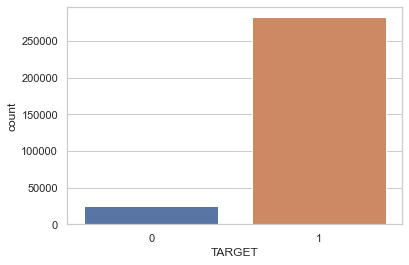

In [45]:
sns.countplot(train['TARGET'])

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
sm = SMOTE(random_state=32, k_neighbors=2)
x_train, y_train = sm.fit_resample(x_train, y_train)

### 1. XGBoost Classifier

In [67]:

from sklearn import metrics

# create an instance of XGBClassifier
xgb = XGBClassifier()

# fit the model to the training data
xgb.fit(x_train, y_train)

# make predictions on the test data
y_pred_test = xgb.predict(x_test)

# calculate and print the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)


Accuracy: 0.916817065834187


Confusion matrix

 [[  184  4831]
 [  285 56203]]

True Positives(TP) =  184

True Negatives(TN) =  56203

False Positives(FP) =  4831

False Negatives(FN) =  285


<AxesSubplot:>

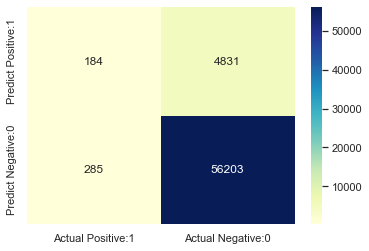

In [53]:
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# print the confusion matrix and other metrics
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# create a heatmap of the confusion matrix
cm_matrix = pd.DataFrame(data = cm, columns = ['Actual Positive:1', 'Actual Negative:0'],
                         index = ['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu')


In [81]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_test)

0.5158223054247538

In [54]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.39      0.04      0.07      5015
           1       0.92      0.99      0.96     56488

    accuracy                           0.92     61503
   macro avg       0.66      0.52      0.51     61503
weighted avg       0.88      0.92      0.88     61503



In [ ]:
# Define the hyperparameter xgboost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(x, y)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

### 2. Logistic Regression

In [76]:
lr = LogisticRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# calculated accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

C:\Users\ACE GROUP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5774189876916573
Confusion Matrix:
 [[ 2834  2181]
 [23809 32679]]


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.11      0.57      0.18      5015
           1       0.94      0.58      0.72     56488

    accuracy                           0.58     61503
   macro avg       0.52      0.57      0.45     61503
weighted avg       0.87      0.58      0.67     61503



In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5718084681658184

In [84]:
# hyperparameter Logistic Regression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter space
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(x, y)

# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


C:\Users\ACE GROUP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ACE GROUP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

C:\Users\ACE GROUP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ACE GROUP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

C:\Users\ACE GROUP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ACE GROUP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ACE GROUP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ACE GROUP\AppData\Loc

Best hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Best score: 0.9192581729384024


### 3. Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

# calculated accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.5774189876916573
Confusion Matrix:
 [[ 2834  2181]
 [23809 32679]]


In [106]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.23      0.02      0.03      5015
           1       0.92      0.99      0.96     56488

    accuracy                           0.91     61503
   macro avg       0.57      0.51      0.50     61503
weighted avg       0.86      0.91      0.88     61503



In [93]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_rf)

0.5065128700430362

In [128]:
rf.feature_importances_

array([2.00084993e-02, 3.01161055e-03, 3.43739882e-03, 3.59561892e-02,
       1.53147085e-02, 1.16081183e-02, 1.76236695e-02, 1.92294447e-02,
       1.89442676e-02, 1.74091158e-02, 1.19306430e-02, 1.28232453e-02,
       9.61861807e-03, 1.47044628e-02, 4.84462042e-03, 2.45497790e-02,
       2.54403606e-02, 2.21824148e-02, 2.01148978e-02, 2.51526412e-02,
       1.00621393e-08, 1.26852455e-03, 4.68153910e-03, 1.71680825e-04,
       3.37963779e-02, 4.63521197e-03, 6.55892475e-02, 9.22784405e-03,
       7.92046142e-03, 2.46781984e-02, 1.53978575e-02, 3.80089951e-04,
       1.42210134e-03, 9.52115527e-04, 4.26458982e-03, 4.52722332e-03,
       8.10357276e-03, 2.14702279e-02, 6.83340207e-02, 7.34578515e-02,
       6.42992053e-02, 2.64842971e-02, 6.20576785e-02, 2.04021636e-02,
       2.84348893e-02, 1.02348843e-05, 5.68763505e-03, 6.54642394e-07,
       5.62517216e-04, 2.83431287e-03, 5.14554305e-06, 4.89063882e-03,
       1.43049098e-04, 2.49096674e-07, 1.07525680e-04, 0.00000000e+00,
      

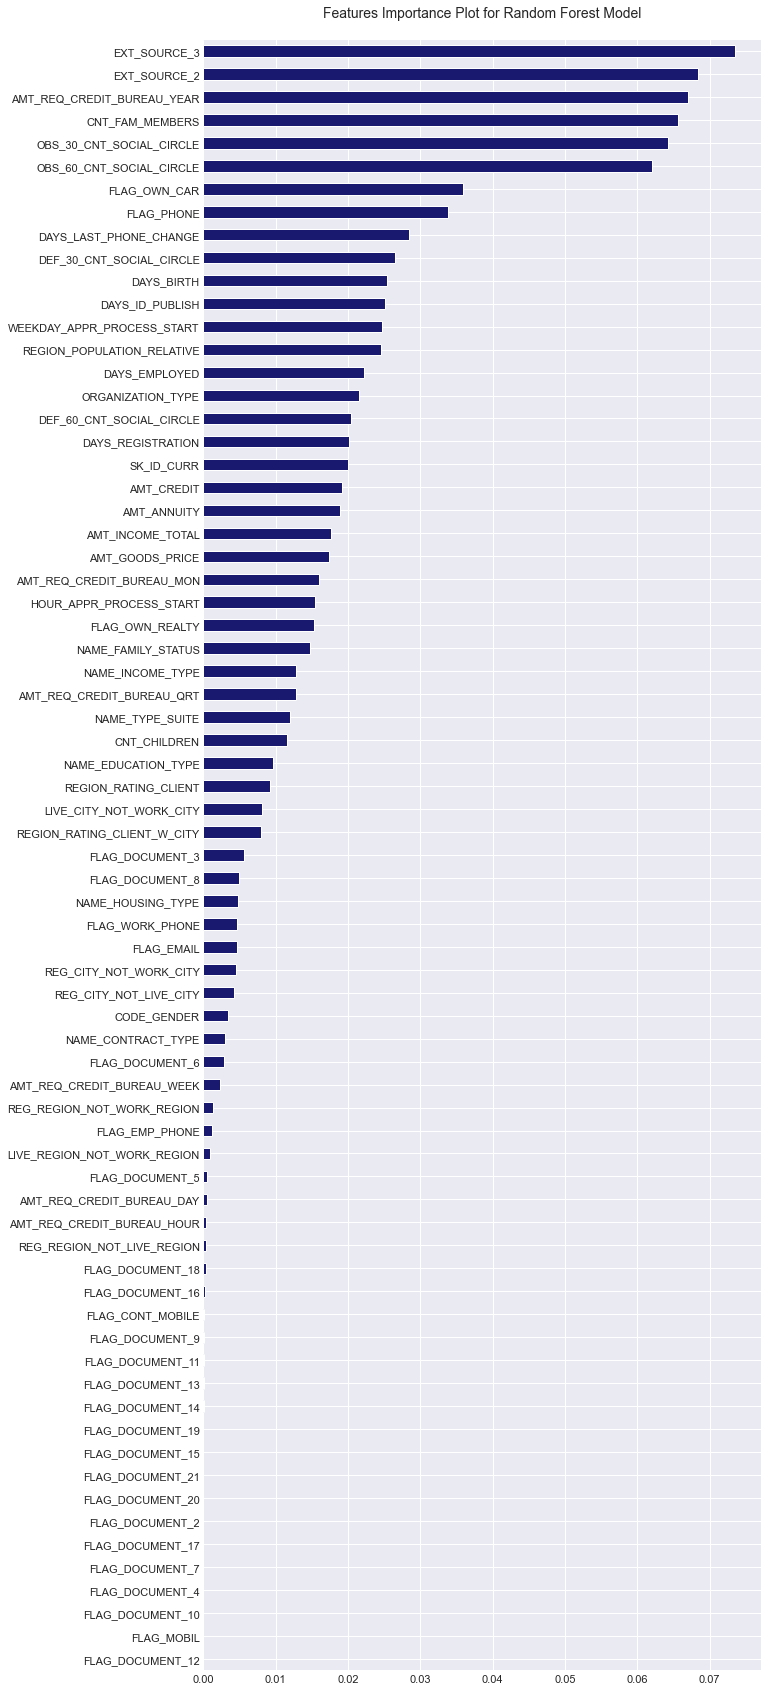

In [139]:
importances_rf = pd.Series(rf.feature_importances_, index = x_train.columns).sort_values(ascending = True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize = (10,30))
fig = importances_rf.plot(kind = 'barh', color = 'midnightblue')
plt.title('Features Importance Plot for Random Forest Model\n', fontsize = 14)
plt.show()

fig.figure.tight_layout()

Feature: 0, Score: 0.0008
Feature: 1, Score: 0.0287
Feature: 2, Score: 0.0016
Feature: 3, Score: 0.0478
Feature: 4, Score: 0.0190
Feature: 5, Score: 0.0245
Feature: 6, Score: 0.0010
Feature: 7, Score: 0.0017
Feature: 8, Score: 0.0016
Feature: 9, Score: 0.0025
Feature: 10, Score: 0.0203
Feature: 11, Score: 0.0138
Feature: 12, Score: 0.0257
Feature: 13, Score: 0.0083
Feature: 14, Score: 0.0018
Feature: 15, Score: 0.0097
Feature: 16, Score: 0.0022
Feature: 17, Score: 0.0040
Feature: 18, Score: 0.0012
Feature: 19, Score: 0.0027
Feature: 20, Score: 0.0000
Feature: 21, Score: 0.0000
Feature: 22, Score: 0.0049
Feature: 23, Score: 0.0021
Feature: 24, Score: 0.0445
Feature: 25, Score: 0.0191
Feature: 26, Score: 0.0833
Feature: 27, Score: 0.0380
Feature: 28, Score: 0.0015
Feature: 29, Score: 0.0146
Feature: 30, Score: 0.0040
Feature: 31, Score: 0.0010
Feature: 32, Score: 0.0010
Feature: 33, Score: 0.0006
Feature: 34, Score: 0.0094
Feature: 35, Score: 0.0010
Feature: 36, Score: 0.0347
Feature: 37

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

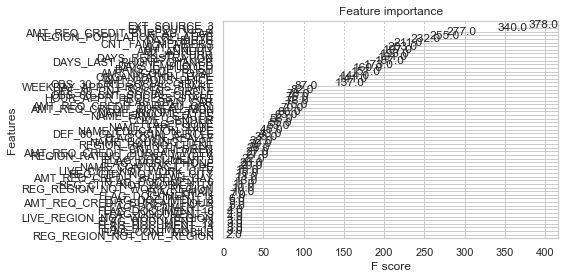

In [121]:
# Get feature importances
importance = xgb.feature_importances_

# Print feature importances
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.4f' % (i,v))

# Plot feature importances
from xgboost import plot_importance
plot_importance(xgb)